# Projeto Bunitooooo de Redes Neurais BUNITAAAAASSSS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly as plty
import sklearn as skl

import matplotlib.mlab as mlabQ
import seaborn as sns

from copy import copy as copy
from pprint import pprint

import sys
import os


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [2]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
ds_path = os.path.abspath("./") + "/cifar-10-batches-py/"

batch_container = [ None for _ in range(5)]

for ii in os.listdir(ds_path):
    if "data" in ii:
        current_id = int(ii[-1]) - 1
        batch_container[current_id] = unpickle(ds_path + ii)
        
        dummy = batch_container[current_id]
        kkeys = list(dummy.keys())

        for kk in kkeys:
            dummy[repr(kk)[2:-1]] = dummy.pop(kk)      

In [4]:
keys_ids = ['batch_label', 'labels', 'data', 'filenames']

In [5]:
for ii in range(5):
    print(ii + 1)
    print(repr(batch_container[ii][keys_ids[0]])[2:-1])
    for keys_ in keys_ids[1:]:
        print(len(batch_container[ii][keys_]))

1
training batch 1 of 5
10000
10000
10000
2
training batch 2 of 5
10000
10000
10000
3
training batch 3 of 5
10000
10000
10000
4
training batch 4 of 5
10000
10000
10000
5
training batch 5 of 5
10000
10000
10000


In [6]:
x_data = [ batch_container[ii]["data"] for ii in range(5)]
y_data = [ batch_container[ii]["labels"] for ii in range(5)]

2

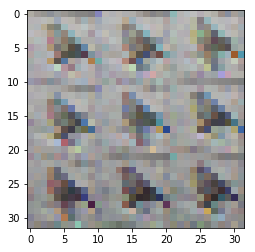

In [7]:
imgplot = plt.imshow(batch_container[0]["data"][120].reshape((32,32,3)),shape=(32,32,3))
batch_container[0]["labels"][120]

In [8]:
from keras.datasets import cifar10

### Paramethers

num_classes = 10

####

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


(32, 32, 3) [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


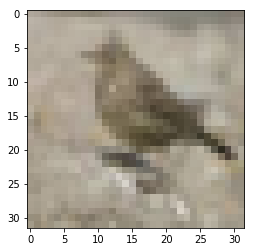

In [9]:
imgplot = plt.imshow(x_train[120],shape=(32,32,3))

print(
x_train[120].shape,
y_train[120],)

**Both image above are the same, but the first has being load from Disk and the other dowload directly from the Keras Repo. Dataset.**

> we are gonna work using the second loaded dataset

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

#Architecture

"""
def createModel(input_shape, nClasses):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model
"""

def createModel(input_shape, nClasses):
    model = Sequential()
    
    model.add(Conv2D(36, (3, 3), padding='same', activation='hard_sigmoid', input_shape=input_shape))
    model.add(Conv2D(48, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
 
    model.add(Conv2D(48, (3, 3), padding='same', activation='exponential'))
    model.add(Conv2D(48, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(48, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
 
    model.add(Flatten())
    model.add(Dense(400, activation='relu'))
    model.add(Dropout(0.8))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(100, activation='tanh'))
    model.add(Dropout(0.3))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [15]:
epochs = 150
batch_size = 500

model1 = createModel(x_train.shape[1:], num_classes)

model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 36)        1008      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 48)        43248     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 48)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 48)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 48)        20784     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 48)        57648     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 48)          0         
__________

In [17]:
history = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(x_test, y_test))

model1.evaluate(x_test, y_test)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 40s 793us/step - loss: 2.3358 - acc: 0.0997 - val_loss: 2.3027 - val_acc: 0.0985
Epoch 2/500
50000/50000 [==============================] - 37s 742us/step - loss: 2.3217 - acc: 0.1015 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 3/500
50000/50000 [==============================] - 38s 762us/step - loss: 2.3049 - acc: 0.1017 - val_loss: 2.3031 - val_acc: 0.1000
Epoch 4/500
50000/50000 [==============================] - 37s 736us/step - loss: 2.2974 - acc: 0.1226 - val_loss: 2.2663 - val_acc: 0.1628
Epoch 5/500
50000/50000 [==============================] - 37s 741us/step - loss: 2.2496 - acc: 0.1527 - val_loss: 2.1940 - val_acc: 0.1798
Epoch 6/500
50000/50000 [==============================] - 37s 743us/step - loss: 2.1751 - acc: 0.1772 - val_loss: 2.1292 - val_acc: 0.1861
Epoch 7/500
50000/50000 [==============================] - 37s 743us/step - loss: 2.1215 - acc: 0.1978 - val_l

Epoch 59/500
50000/50000 [==============================] - 38s 753us/step - loss: 0.9518 - acc: 0.6839 - val_loss: 0.9272 - val_acc: 0.6931
Epoch 60/500
50000/50000 [==============================] - 37s 747us/step - loss: 0.9356 - acc: 0.6907 - val_loss: 0.8885 - val_acc: 0.7052
Epoch 61/500
50000/50000 [==============================] - 39s 777us/step - loss: 0.9357 - acc: 0.6902 - val_loss: 0.8811 - val_acc: 0.7133
Epoch 62/500
50000/50000 [==============================] - 37s 746us/step - loss: 0.9319 - acc: 0.6915 - val_loss: 0.8857 - val_acc: 0.7080
Epoch 63/500
50000/50000 [==============================] - 37s 747us/step - loss: 0.9186 - acc: 0.6962 - val_loss: 0.8969 - val_acc: 0.7103
Epoch 64/500
50000/50000 [==============================] - 37s 748us/step - loss: 0.9121 - acc: 0.6987 - val_loss: 0.8699 - val_acc: 0.7176
Epoch 65/500
50000/50000 [==============================] - 37s 744us/step - loss: 0.9007 - acc: 0.7039 - val_loss: 0.8837 - val_acc: 0.7099
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 38s 752us/step - loss: 0.7112 - acc: 0.7752 - val_loss: 0.8527 - val_acc: 0.7382
Epoch 118/500
50000/50000 [==============================] - 39s 780us/step - loss: 0.6958 - acc: 0.7794 - val_loss: 0.8317 - val_acc: 0.7398
Epoch 119/500
50000/50000 [==============================] - 38s 756us/step - loss: 0.7101 - acc: 0.7767 - val_loss: 0.7330 - val_acc: 0.7722
Epoch 120/500
50000/50000 [==============================] - 38s 752us/step - loss: 0.7003 - acc: 0.7769 - val_loss: 0.7663 - val_acc: 0.7644
Epoch 121/500
50000/50000 [==============================] - 38s 753us/step - loss: 0.6845 - acc: 0.7814 - val_loss: 0.8111 - val_acc: 0.7583
Epoch 122/500
50000/50000 [==============================] - 38s 751us/step - loss: 0.7026 - acc: 0.7774 - val_loss: 0.7285 - val_acc: 0.7799
Epoch 123/500
50000/50000 [==============================] - 39s 777us/step - loss: 0.6872 - acc: 0.7851 - val_loss: 0.8141 - val_acc: 0.7520
Epoch 

Epoch 175/500
50000/50000 [==============================] - 39s 774us/step - loss: 0.6336 - acc: 0.8042 - val_loss: 0.7655 - val_acc: 0.7727
Epoch 176/500
50000/50000 [==============================] - 37s 749us/step - loss: 0.6396 - acc: 0.8003 - val_loss: 0.7254 - val_acc: 0.7815
Epoch 177/500
50000/50000 [==============================] - 37s 747us/step - loss: 0.6494 - acc: 0.7995 - val_loss: 0.7702 - val_acc: 0.7690
Epoch 178/500
50000/50000 [==============================] - 37s 748us/step - loss: 0.6331 - acc: 0.8037 - val_loss: 0.7301 - val_acc: 0.7813
Epoch 179/500
50000/50000 [==============================] - 38s 750us/step - loss: 0.6390 - acc: 0.8028 - val_loss: 0.7154 - val_acc: 0.7834
Epoch 180/500
50000/50000 [==============================] - 39s 777us/step - loss: 0.6329 - acc: 0.8055 - val_loss: 0.7365 - val_acc: 0.7755
Epoch 181/500
50000/50000 [==============================] - 38s 753us/step - loss: 0.6348 - acc: 0.8039 - val_loss: 0.7453 - val_acc: 0.7773
Epoch 

Epoch 233/500
50000/50000 [==============================] - 37s 749us/step - loss: 0.6495 - acc: 0.8036 - val_loss: 0.8238 - val_acc: 0.7672
Epoch 234/500
50000/50000 [==============================] - 37s 750us/step - loss: 0.6552 - acc: 0.8014 - val_loss: 0.7278 - val_acc: 0.7861
Epoch 235/500
50000/50000 [==============================] - 37s 748us/step - loss: 0.6582 - acc: 0.8005 - val_loss: 0.7380 - val_acc: 0.7866
Epoch 236/500
50000/50000 [==============================] - 38s 756us/step - loss: 0.6611 - acc: 0.7976 - val_loss: 0.7443 - val_acc: 0.7859
Epoch 237/500
50000/50000 [==============================] - 39s 787us/step - loss: 0.6598 - acc: 0.8018 - val_loss: 0.7088 - val_acc: 0.7902
Epoch 238/500
50000/50000 [==============================] - 37s 748us/step - loss: 0.6575 - acc: 0.8020 - val_loss: 0.7938 - val_acc: 0.7691
Epoch 239/500
50000/50000 [==============================] - 37s 749us/step - loss: 0.6478 - acc: 0.8027 - val_loss: 0.7303 - val_acc: 0.7842
Epoch 

Epoch 291/500
50000/50000 [==============================] - 39s 783us/step - loss: 0.7474 - acc: 0.7758 - val_loss: 0.7614 - val_acc: 0.7781
Epoch 292/500
50000/50000 [==============================] - 39s 783us/step - loss: 0.7282 - acc: 0.7813 - val_loss: 0.8207 - val_acc: 0.7582
Epoch 293/500
50000/50000 [==============================] - 40s 801us/step - loss: 0.7172 - acc: 0.7841 - val_loss: 0.7646 - val_acc: 0.7764
Epoch 294/500
50000/50000 [==============================] - 39s 783us/step - loss: 0.7411 - acc: 0.7770 - val_loss: 0.7798 - val_acc: 0.7764
Epoch 295/500
50000/50000 [==============================] - 39s 785us/step - loss: 0.7392 - acc: 0.7752 - val_loss: 0.8055 - val_acc: 0.7656
Epoch 296/500
50000/50000 [==============================] - 39s 783us/step - loss: 0.7699 - acc: 0.7652 - val_loss: 0.8352 - val_acc: 0.7502
Epoch 297/500
50000/50000 [==============================] - 39s 790us/step - loss: 0.7566 - acc: 0.7717 - val_loss: 0.7788 - val_acc: 0.7756
Epoch 

Epoch 349/500
50000/50000 [==============================] - 39s 786us/step - loss: 0.8262 - acc: 0.7484 - val_loss: 0.8760 - val_acc: 0.7421
Epoch 350/500
50000/50000 [==============================] - 38s 767us/step - loss: 0.8404 - acc: 0.7433 - val_loss: 0.8293 - val_acc: 0.7503
Epoch 351/500
50000/50000 [==============================] - 38s 763us/step - loss: 0.8374 - acc: 0.7478 - val_loss: 0.8244 - val_acc: 0.7553
Epoch 352/500
50000/50000 [==============================] - 38s 765us/step - loss: 0.8627 - acc: 0.7366 - val_loss: 0.7899 - val_acc: 0.7717
Epoch 353/500
50000/50000 [==============================] - 39s 771us/step - loss: 0.8166 - acc: 0.7522 - val_loss: 0.7947 - val_acc: 0.7679
Epoch 354/500
50000/50000 [==============================] - 39s 786us/step - loss: 0.8728 - acc: 0.7312 - val_loss: 0.9370 - val_acc: 0.7152
Epoch 355/500
50000/50000 [==============================] - 38s 764us/step - loss: 0.8728 - acc: 0.7345 - val_loss: 0.8516 - val_acc: 0.7462
Epoch 

Epoch 407/500
50000/50000 [==============================] - 38s 758us/step - loss: 1.4994 - acc: 0.5159 - val_loss: 1.4478 - val_acc: 0.5261
Epoch 408/500
50000/50000 [==============================] - 38s 759us/step - loss: 1.4865 - acc: 0.5099 - val_loss: 1.1469 - val_acc: 0.6394
Epoch 409/500
50000/50000 [==============================] - 38s 762us/step - loss: 1.4839 - acc: 0.5092 - val_loss: 1.2544 - val_acc: 0.5904
Epoch 410/500
50000/50000 [==============================] - 38s 762us/step - loss: 1.5610 - acc: 0.4888 - val_loss: 1.5108 - val_acc: 0.4878
Epoch 411/500
50000/50000 [==============================] - 39s 788us/step - loss: 1.5367 - acc: 0.4935 - val_loss: 1.4206 - val_acc: 0.5232
Epoch 412/500
50000/50000 [==============================] - 38s 767us/step - loss: 1.5673 - acc: 0.4754 - val_loss: 1.2597 - val_acc: 0.5885
Epoch 413/500
50000/50000 [==============================] - 38s 762us/step - loss: 1.8311 - acc: 0.3755 - val_loss: 1.5716 - val_acc: 0.4820
Epoch 

Epoch 465/500
50000/50000 [==============================] - 37s 746us/step - loss: 2.2935 - acc: 0.1188 - val_loss: 2.2910 - val_acc: 0.1226
Epoch 466/500
50000/50000 [==============================] - 37s 745us/step - loss: 2.2945 - acc: 0.1182 - val_loss: 2.2897 - val_acc: 0.1203
Epoch 467/500
50000/50000 [==============================] - 39s 771us/step - loss: 2.2937 - acc: 0.1194 - val_loss: 2.2903 - val_acc: 0.1190
Epoch 468/500
50000/50000 [==============================] - 38s 757us/step - loss: 2.2943 - acc: 0.1188 - val_loss: 2.2880 - val_acc: 0.1297
Epoch 469/500
50000/50000 [==============================] - 38s 753us/step - loss: 2.2932 - acc: 0.1223 - val_loss: 2.2874 - val_acc: 0.1322
Epoch 470/500
50000/50000 [==============================] - 38s 761us/step - loss: 2.2940 - acc: 0.1215 - val_loss: 2.2883 - val_acc: 0.1259
Epoch 471/500
50000/50000 [==============================] - 38s 760us/step - loss: 2.2940 - acc: 0.1189 - val_loss: 2.2895 - val_acc: 0.1265
Epoch 

[2.284805365753174, 0.133]

Text(0.5,1,'Accuracy Curves')

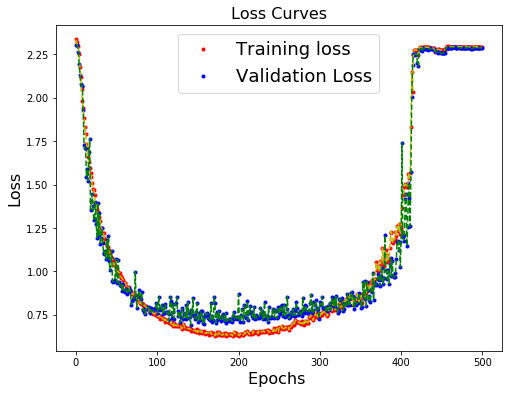

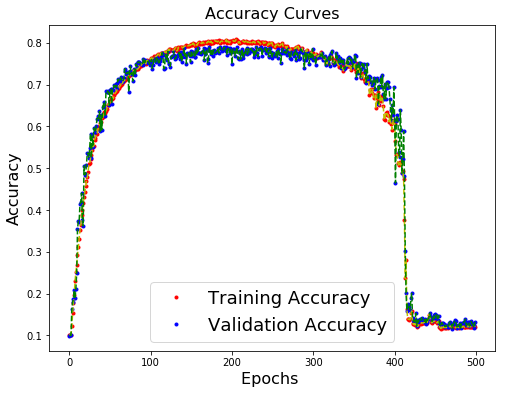

In [18]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'.r')
plt.plot(history.history['val_loss'],'.b')
plt.plot(history.history['loss'],'--y')
plt.plot(history.history['val_loss'],'--g')
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'.r')
plt.plot(history.history['val_acc'],'.b')
plt.plot(history.history['acc'],'--y')
plt.plot(history.history['val_acc'],'--g')
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [19]:
model1.save(filepath="./ann_model", include_optimizer=1)